In [444]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plot_params = dict(
    color = '0.75',
    markeredgecolor="0.25",
    markerfacecolor="0.25"
)

In [489]:
n_sample = 30
sample_eps = np.random.normal(0, 4, n_sample)
sample_x1_ = np.random.normal(10, 6, n_sample)
sample_x1 = np.sort(sample_x1_)
sample_x2_ = np.random.normal(15, 8, n_sample)
sample_x2 = np.sort(sample_x2_)

alpha = np.random.choice(np.linspace(0.1, 10, 30))
betta_1 = np.random.choice(np.linspace(0.1, 10, 30))
betta_2 = np.random.choice(np.linspace(0.1, 10, 30))

y = alpha + betta_1*sample_x1 + betta_2*sample_x2 + sample_eps
print(f'y = {alpha:.2f} + {betta_1:.2f}*x1 + {betta_2:.2f}*x2 + eps')

y = 7.27 + 1.81*x1 + 4.20*x2 + eps


## Построение парных регрессий

y_1 =  a1 + b1*x1

In [490]:
def pair_linregr_stat_values(x, y):

    n = len(x)
    res = stats.linregress(x, y)
    a1 = res.intercept
    b1 = res.slope
    
    y_pred = a1 + b1*x

    r_coeff = 1 - sum((y - y_pred)**2) / sum((y - y.mean())**2) # Коэффициент детерминации
    r_corr = np.sqrt(r_coeff) # коэффициент корреляции

    F_stat = r_coeff / ( 1 - r_coeff) * (n-2) # F-статистика

    mean_error = 1/n * sum(abs((y - y_pred) / y)) # Средняя ошибка апроксимации

    return a1, b1, r_coeff, r_corr, F_stat, mean_error, y_pred

### Вычисление для парных регрессий
- коэффициентов уравнения линейной регрессии, 
- коэффициентов детерминации, 
- коэффициентов корреляции, 
- значение F статистики, 
- величину средней ошибки аппроксимации


In [491]:
a1, b1, r_coeff_1, r_corr_1, F_stat_1, mean_error_1, y_pred_1 = pair_linregr_stat_values(sample_x1, y)
print(f'a1 = {a1:.2f}',
      f'\nb1 = {b1:.2f}',
      f'\nКоэффициент детерминации: r_coeff_1 = {r_coeff_1:.5f}',
      f'\nF-статистика: F_stat_1 = {F_stat_1:.2f}',
      f'\nСредняя ошибка аппроксимации: mean_error_1 = {mean_error_1:.2f}')

a1 = 25.05 
b1 = 6.84 
Коэффициент детерминации: r_coeff_1 = 0.94666 
F-статистика: F_stat_1 = 496.90 
Средняя ошибка аппроксимации: mean_error_1 = 2.01


In [492]:
a2, b2, r_coeff_2, r_corr_2, F_stat_2, mean_error_2, y_pred_2 = pair_linregr_stat_values(sample_x2, y)
print(f'a2 = {a2:.2f}',
      f'\nb2 = {b2:.2f}',
      f'\nКоэффициент детерминации: r_coeff_2 = {r_coeff_2:.5f}',
      f'\nF-статистика: F_stat_2 = {F_stat_2:.2f}',
      f'\nСредняя ошибка аппроксимации: mean_error_2 = {mean_error_2:.2f}')

a2 = 0.93 
b2 = 5.72 
Коэффициент детерминации: r_coeff_2 = 0.98978 
F-статистика: F_stat_2 = 2712.31 
Средняя ошибка аппроксимации: mean_error_2 = 1.01


### Построение полей корреляции, диаграммы остатков на фактор, диаграммы на номера наблюдения

Text(0, 0.5, 'remains_1')

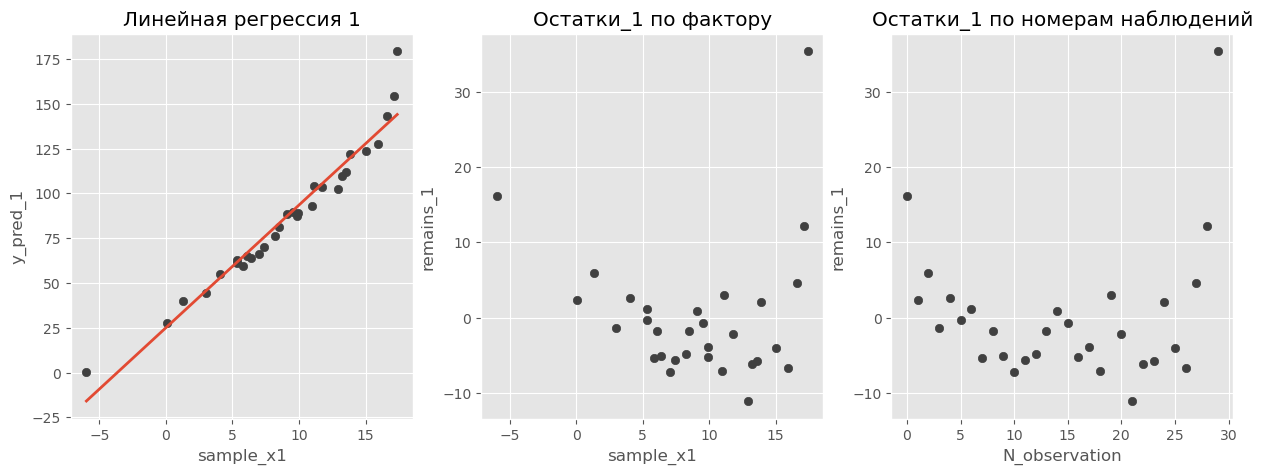

In [493]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(sample_x1, y_pred_1, linewidth=2, label='Линейная регрессия')
ax[0].scatter(sample_x1, y, color='0.25', label='Данные')
ax[0].set_title('Линейная регрессия 1')
ax[0].set_xlabel('sample_x1')
ax[0].set_ylabel('y_pred_1')
remains_1 = y - y_pred_1
ax[1].scatter(sample_x1, remains_1, color = '0.25')
ax[1].set_title('Остатки_1 по фактору')
ax[1].set_xlabel('sample_x1')
ax[1].set_ylabel('remains_1')              
ax[2].scatter(np.arange(len(remains_1)), remains_1, color = '0.25')
ax[2].set_title('Остатки_1 по номерам наблюдений')
ax[2].set_xlabel('N_observation')
ax[2].set_ylabel('remains_1')   

Text(0, 0.5, 'remains_2')

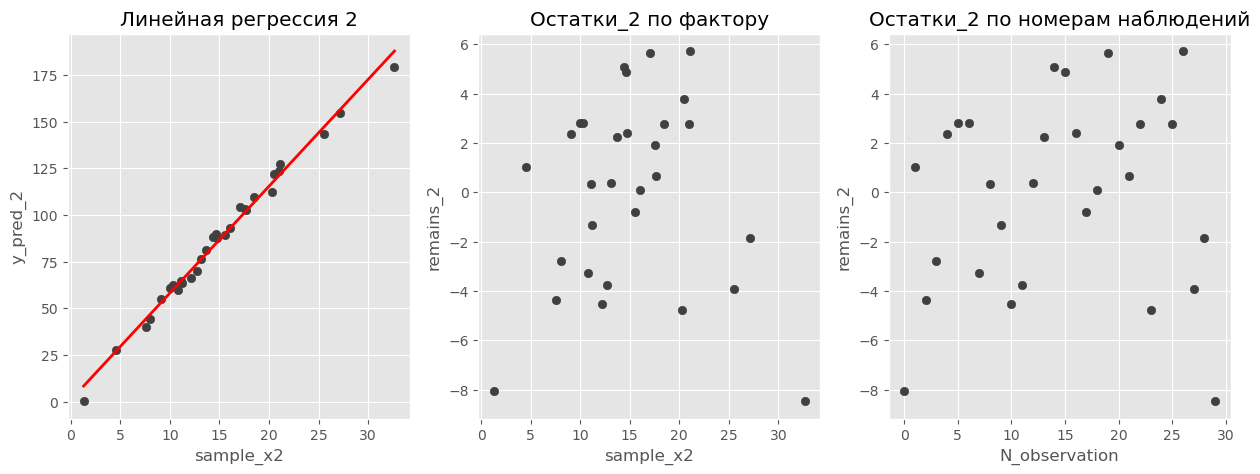

In [494]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(sample_x2, y_pred_2, color='red', linewidth=2, label='Линейная регрессия')
ax[0].scatter(sample_x2, y, color='0.25', label='Данные')
ax[0].set_title('Линейная регрессия 2')
ax[0].set_xlabel('sample_x2')
ax[0].set_ylabel('y_pred_2')
remains_2 = y - y_pred_2
ax[1].scatter(sample_x2, remains_2, color='0.25')
ax[1].set_title('Остатки_2 по фактору')
ax[1].set_xlabel('sample_x2')
ax[1].set_ylabel('remains_2') 
ax[2].scatter(np.arange(len(remains_2)), remains_2, color='0.25')
ax[2].set_title('Остатки_2 по номерам наблюдений')
ax[2].set_xlabel('N_observation')
ax[2].set_ylabel('remains_2')  

### Мультиколлинеарность факторов

In [495]:
X = np.zeros(shape = (n_sample,3))
X[:, 0] = 1
X[:, 1] = sample_x1
X[:, 2] = sample_x2
det_X = np.linalg.det(X.T@X)
det_X

2806957.9317953936

Определитель |X.T * X| существенно отличен от нуля. 

### Вычисление коэффициентов уравнения множественной регрессии

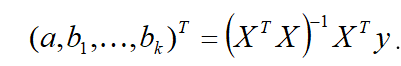


In [496]:
X_inv = np.linalg.inv(X.T@X)
a, b1, b2  = X_inv @ X.T @ y
print(f'a = {a:.3f} b1 = {b1:.3f} b2 = {b2:.3f}')

a = 5.715 b1 = 1.761 b2 = 4.345


### Вычисление теоретических(расчетных) значений y_x1_x2

In [497]:
y_x1_x2 = a + b1*sample_x1 + b2*sample_x2
print(f'y_x1_x2 = {a:.2f} + {b1:.3f}*x1 + {b2:.3f}*x2')

y_x1_x2 = 5.71 + 1.761*x1 + 4.345*x2


### Вычисление остатков. Построение диаграммы остатков на номера наблюдений

Text(0, 0.5, 'Остатки')

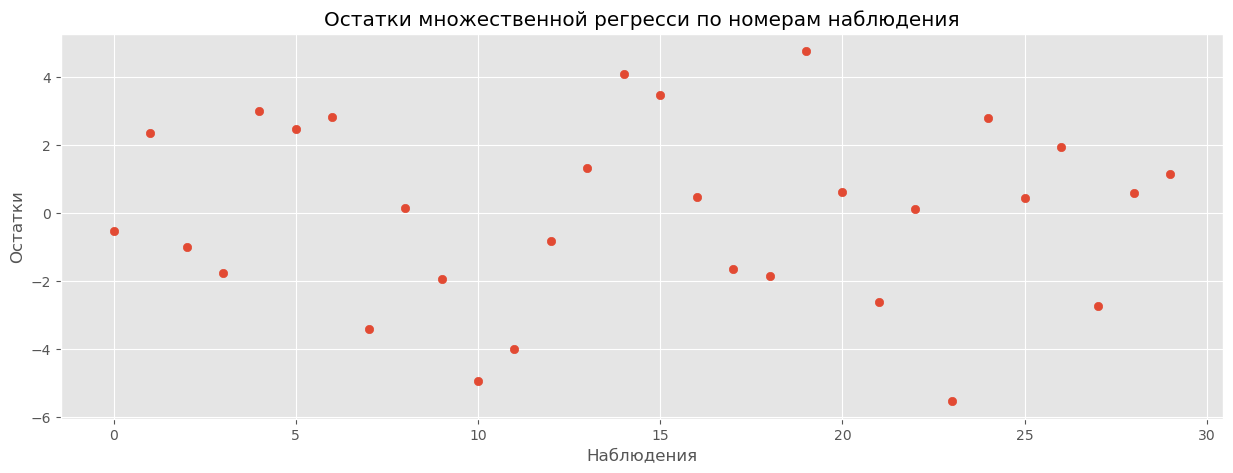

In [498]:
remains_x1_x2 = y - y_x1_x2
fig, ax = plt.subplots(figsize = (15, 5))
ax.scatter(np.arange(len(remains_x1_x2)), remains_x1_x2)
ax.set_title('Остатки множественной регресси по номерам наблюдения')
ax.set_xlabel('Наблюдения')
ax.set_ylabel('Остатки')

### Оценка для дисперсии остатков и средняя ошибка аппроксимации

In [499]:
remains_error = np.sum((y - y_x1_x2)**2) / (n_sample - 2 - 1) 
MAE = 1/n_sample * np.sum(abs(y - y_x1_x2))
MSE = 1/n_sample* np.sum((y-y_x1_x2)**2)
print('Оценка для дисперсии остатков:', remains_error)
print('MAE:', MAE)

Оценка для дисперсии остатков: 7.701330647926584
MAE: 2.179874560252796


### Множественный коэффициент детерминации R^2

In [501]:
R_sq = 1 - np.sum((y - y_x1_x2)**2) / np.sum((y - y.mean())**2)
print(f'Множественный коэффициент детерминации R^2: {R_sq:.3f}')
print(f'Коэффициент детерминации для y_1:, {r_coeff_1:.3f}')
print(f'Коэффициент детерминации для y_2:, {r_coeff_2:.3f}')

Множественный коэффициент детерминации R^2: 0.995
Коэффициент детерминации для y_1:, 0.947
Коэффициент детерминации для y_2:, 0.990


### Фактическое значение F критерия, значимость уравнения в целом на уровне значимости 5%

In [502]:
alpha = 0.05
F_stat = R_sq / ( 1 - R_sq) * (n_sample-2)
F_critical = stats.f.ppf(1 - alpha, 1, n_sample-3)
if F_stat > F_critical:
    print(f'F-статистика: {F_stat:.3f} > {F_critical:.3f}')
    print('Уравнение линейной регрессии является статистически значимым')
else:
    print(f'F-статистика: {F_stat:.3f} < {F_critical:.3f}')
    print('Уравнение линейной регрессии не является статистически значимым')

F-статистика: 5692.336 > 4.210
Уравнение линейной регрессии является статистически значимым


### Частные коэффициенты корреляции

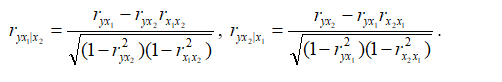

In [503]:
var_matrix = pd.DataFrame({'x1': sample_x1, 'x2': sample_x2, 'y': y})  ### y - ???????? or y_x1_x2 ?????
matrix_cor = var_matrix.corr()

r_x1_x2, r_x2_x1, r_y_x1, r_y_x2 = matrix_cor['x1']['x2'], matrix_cor['x2']['x1'], matrix_cor['y']['x1'], matrix_cor['y']['x2']

r_yx1__x2 = (r_y_x1 - r_y_x2 * r_x1_x2) / np.sqrt((1-r_y_x2**2)*(1 - r_x1_x2**2))
r_yx2__x1 = (r_y_x2 - r_y_x1 * r_x2_x1) / np.sqrt((1-r_y_x1**2)*(1 - r_x2_x1**2))
print(f'Частные коэффициенты корреляции:\nr_yx1__x2 = {r_yx1__x2:.3f}\nr_yx2__x1 = {r_yx2__x1:.3f}')
print(f'Парные коэффициенты корреляции:\nr_coeff_1 = {r_coeff_1:.3f}\nr_coeff_2 = {r_coeff_2:.3f}')

Частные коэффициенты корреляции:
r_yx1__x2 = 0.722
r_yx2__x1 = 0.953
Парные коэффициенты корреляции:
r_coeff_1 = 0.947
r_coeff_2 = 0.990


### Стандартные ошибки коэффициентов регрессии

In [504]:
m_a = remains_error * np.sqrt(X_inv[0][0])
m_b1 = remains_error * np.sqrt(X_inv[1][1])
m_b2 = remains_error * np.sqrt(X_inv[2][2])
print(f'm_a = {m_a:.3f}\nm_b1 = {m_b1:.3f}\nm_b2 = {m_b2:.3f}')

m_a = 4.286
m_b1 = 0.902
m_b2 = 0.738


### t-Критерий Стьюдента для параметров множественной регрессии на уровне значимости 5%

In [505]:
def t_test_for_param(param, param_SE, alpha):
    t_critical = stats.t.ppf(1-alpha, df = n_sample - 3)
    t_stat = param / param_SE
    print('t-статистика', t_stat)
    print('t-критическое', t_critical)
    if abs(t_stat) > t_critical: return True
    else: return False
        
if t_test_for_param(a, m_a, alpha):
    print('Отвергаем H0 на уровне значимости 5%:\nКоэффициент - a - статистически значим')
else:
    print('Принимаем H0 на уровне значимости 5%:\nКоэффициент - a - статистически не значим')
print()
if t_test_for_param(b1, m_b1, alpha):
    print('Отвергаем H0 на уровне значимости 5%:\nКоэффициент - b1 - статистически значим')
else:
    print('Принимаем H0 на уровне значимости 5%:\nКоэффициент - b1 - статистически не значим')
print()
if t_test_for_param(b2, m_b2, alpha):
    print('Отвергаем H0 на уровне значимости 5%:\nКоэффициент - b2 - статистически значим')
else:
    print('Принимаем H0 на уровне значимости 5%:\nКоэффициент - b2 - статистически не значим')

t-статистика 1.3331677954184107
t-критическое 1.7032884457221265
Принимаем H0 на уровне значимости 5%:
Коэффициент - a - статистически не значим

t-статистика 1.9525802999098139
t-критическое 1.7032884457221265
Отвергаем H0 на уровне значимости 5%:
Коэффициент - b1 - статистически значим

t-статистика 5.890756877249389
t-критическое 1.7032884457221265
Отвергаем H0 на уровне значимости 5%:
Коэффициент - b2 - статистически значим


### Точечный прогноз для значений переменных на 200% превышающих их средние значения.

In [506]:
x1_forecast = sample_x1.mean() * 2
x2_forecast = sample_x2.mean() * 2 

y_forecast = a + x1_forecast*b1 + x2_forecast*b2
print('Прогноз для значений переменных на 200% превышающих их средние значения', y_forecast)

Прогноз для значений переменных на 200% превышающих их средние значения 167.84044274601598


### Интервальный прогноз с уровнем доверия 0.95

In [507]:
x_forecast_vct = np.array([1, x1_forecast, x2_forecast])
SE_forecast = np.sqrt(MSE*(1+ x_forecast_vct.T @ X_inv @ x_forecast_vct))
t_critical = stats.t.ppf(1-alpha/2, df = n_sample - 3)

conf_interval = np.array([y_forecast - t_critical * SE_forecast,
                          y_forecast + t_critical * SE_forecast])
print(f'Доверительный интервал: {conf_interval}')

Доверительный интервал: [161.65820565 174.02267984]


### Построение множественной линейной регрессии с помощью библиотеки statsmodels

In [508]:
import statsmodels.api as sm

X_all = np.column_stack((sample_x1, sample_x2))
X_all = sm.add_constant(X_all)
model = sm.OLS(y, X_all).fit()
y_pred = model.predict(X)

print(model.params)
print([a, b1, b2])

[5.71453487 1.76132294 4.34542648]
[5.71453487429774, 1.761322935702525, 4.345426479968708]
